# Presentation

This subject is issued from a question posted on <a href="https://openclassrooms.com/forum/sujet/graph-python-dun-vecteur-propre-dune-matrice?page=1#message-91788873">OpenClassRoom</a>. The objective was to be able to explore how eigenvalues and eigenvector are impacted by randomness in Tridiagonal Matrices. This is only the beginning of an algorithm to understand how <a href="https://en.wikipedia.org/wiki/Anderson_localization">Anderson's Localization</a> works.

In [1]:
from matplotlib import pyplot as plt # Import pyplot as plt from the library matplotlib
import scipy
import numpy as np # Import the library numpy under the name np

In [2]:
n = 200 # Matrice size
I0 = 1 # Value of the main diagonal
I1 = 0.1 # Value of adjacent diagonal
y = [1, 198] # Vectors to be plotted

Now let's create the main Tridiagonal Matrix A and get eigenvalues and eignevectors

In [3]:
A = np.eye(n, n, k=-1)*I1 + np.eye(n, n)*I0 + np.eye(n, n, k=1)*I1  # Tridiagonal matrix without disorder
print(A)

[[ 1.   0.1  0.  ...,  0.   0.   0. ]
 [ 0.1  1.   0.1 ...,  0.   0.   0. ]
 [ 0.   0.1  1.  ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  1.   0.1  0. ]
 [ 0.   0.   0.  ...,  0.1  1.   0.1]
 [ 0.   0.   0.  ...,  0.   0.1  1. ]]


In [4]:
eigenvaluesA, eigenvectorsA = np.linalg.eigh(A) # eigh as we have a symmetrical matrix
print(eigenvaluesA)

[ 0.80002443  0.80009771  0.80021982  0.80039074  0.80061042  0.8008788
  0.80119583  0.80156143  0.8019755   0.80243794  0.80294865  0.80350749
  0.80411434  0.80476903  0.80547142  0.80622133  0.80701857  0.80786296
  0.80875429  0.80969233  0.81067686  0.81170765  0.81278443  0.81390694
  0.81507491  0.81628806  0.81754609  0.81884869  0.82019554  0.82158631
  0.82302067  0.82449826  0.82601873  0.82758169  0.82918678  0.83083359
  0.83252173  0.83425078  0.83602032  0.83782991  0.83967913  0.84156751
  0.84349459  0.8454599   0.84746296  0.84950329  0.85158038  0.85369373
  0.85584282  0.85802713  0.86024611  0.86249924  0.86478596  0.86710571
  0.86945792  0.87184202  0.87425743  0.87670355  0.8791798   0.88168556
  0.88422022  0.88678317  0.88937377  0.8919914   0.89463541  0.89730516
  0.9         0.90271927  0.9054623   0.90822842  0.91101697  0.91382725
  0.91665858  0.91951028  0.92238163  0.92527194  0.92818052  0.93110663
  0.93404957  0.93700863  0.93998307  0.94297218  0.

Now, we have to add some noises to the matrix A.

In [5]:
h = 0.01 # Coefficient setting the maximum randomness
I2 = 1 # 0 if you want to keep the main diagonal clear, else 1
I3 = 1 # 0 if you want to keep the second and third diagonal clear, else 1

In [6]:
noise = np.random.rand(n, n) * h 
tridiag = np.eye(n, n, k=-1)*I3 + np.eye(n, n)*I2 + np.eye(n, n, k=1)*I3  # Create a tridiagonal matrix only to take noise on diagonals
w = noise * tridiag
print(w)

[[  7.98890581e-03   5.15813897e-03   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.42807632e-03   4.14745354e-03   3.60562689e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   9.00083583e-03   4.07312172e-03 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   8.32444051e-03
    4.31909450e-03   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   2.90376738e-03
    4.53599732e-04   7.65350003e-03]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    9.34827426e-05   6.18288194e-03]]


In [7]:
B = A + w # Add the tridiagonal noise matrix and the ordered matrix together
print(B)

[[ 1.00798891  0.10515814  0.         ...,  0.          0.          0.        ]
 [ 0.10242808  1.00414745  0.10360563 ...,  0.          0.          0.        ]
 [ 0.          0.10900084  1.00407312 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  1.00832444  0.10431909  0.        ]
 [ 0.          0.          0.         ...,  0.10290377  1.0004536
   0.1076535 ]
 [ 0.          0.          0.         ...,  0.          0.10009348
   1.00618288]]


In [8]:
eigenvaluesB, eigenvectorsB = np.linalg.eig(B) # eig used as the matrix is no symmetrical anymore
print(eigenvaluesB)

[ 1.2174268   1.21661971  1.21535938  1.21611825  1.21435337  1.21337677
  1.21350452  1.21303644  1.21285817  1.2123028   1.21168217  1.21095839
  1.2105309   1.21004637  1.20935219  1.20844395  1.20767751  1.20652035
  1.20573026  1.2049651   1.20326516  1.19365471  1.19473803  1.20211213
  1.20113333  1.20007677  1.19858534  1.19772295  1.19630752  1.19201997
  1.19085558  1.18899561  1.18438436  1.18564374  1.1874686   1.16692771
  1.1692246   1.18247587  1.18084904  1.17915506  1.17141739  1.17318384
  1.17503838  1.17742239  1.16465948  1.15848022  1.16266858  1.16088929
  1.15642188  1.15383938  1.15139658  1.14867735  1.14651325  1.14438517
  1.14213593  1.13950499  1.13718732  1.13452901  1.11231861  1.13152256
  1.11567227  1.12898751  1.12656307  1.11815321  1.12362688  1.12143146
  1.10695162  1.10980148  1.08901803  1.09286346  1.09554701  1.09837403
  1.10398194  1.10133845  1.08629165  1.08346297  1.08001573  1.07696006
  1.07428968  1.07139889  1.06803783  1.04895411  1

Let's see a how eigenvalues changed

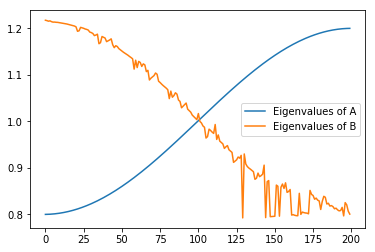

In [9]:
plt.plot(eigenvaluesA, label = "Eigenvalues of A")
plt.plot(eigenvaluesB, label = "Eigenvalues of B")
plt.legend()
plt.show()

We can see that B's eigenvalues are not sorted anymore. We can now sort it. The idea is to be able to plot the n-th eigenvector of A and B. If they are not sorted, we won't compare the same vector.

In [10]:
idx = eigenvaluesB.argsort()[::1]   # let take the order
eigenvaluesB = eigenvaluesB[idx]     # sort eigenvalues accordingly
eigenvectorsB = eigenvectorsB[:,idx] # and sort all column of eigenvectors of B

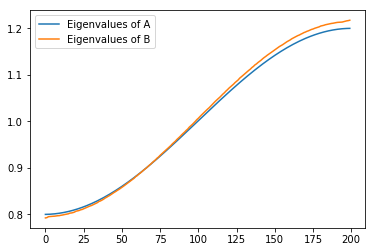

In [11]:
plt.plot(eigenvaluesA, label = "Eigenvalues of A")
plt.plot(eigenvaluesB, label = "Eigenvalues of B")
plt.legend()
plt.show()

Now we have both matrices sorted in ascending order. We can plot all vectors requested in y.

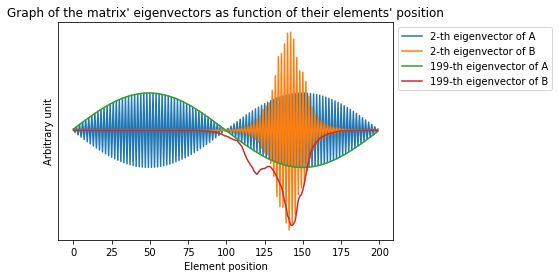

In [12]:
for position in y:
    plt.plot(eigenvectorsA[:,position], label="{}-th eigenvector of A".format(position+1))
    plt.plot(eigenvectorsB[:,position], label="{}-th eigenvector of B".format(position+1))

plt.title("Graph of the matrix' eigenvectors as function of their elements' position")
plt.xlabel("Element position")
plt.ylabel("Arbitrary unit")
plt.yticks([]) # Removes y axis' values since they are arbitrary
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) # Legend is outside the plot

plt.show()

Now we can see that the randomness distorted eigenvectors (green vs red or blue vs orange). On the original matrice A, all vector are sinusoid with a frequency increasing with the eigenvalue. For the randomized matrix, eigenvectors shape is not a sinusoid anymore but a deformed one. Also the n-a th vector in not "contained" anymore inside the a-th vector. This phenomenon i is used in quantum theory to "estimate" particles positions. Unfortunately, my level in Physic is not good enought to go further on this subject :'( 